In [148]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('sphist.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date', ascending=True)
data = data[data['Date'] >= datetime(year=2000, month=1, day=1)]

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008 entries, 4007 to 0
Data columns (total 7 columns):
Date         4008 non-null datetime64[ns]
Open         4008 non-null float64
High         4008 non-null float64
Low          4008 non-null float64
Close        4008 non-null float64
Volume       4008 non-null float64
Adj Close    4008 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 250.5 KB


In [151]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
4007,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,9.318000e+08,1455.219971
4006,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1.009000e+09,1399.420044
4005,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1.085500e+09,1402.109985
4004,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1.092300e+09,1403.449951
4003,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1.225200e+09,1441.469971


In [152]:
# Null entries
print( data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [153]:
data['Volume'].fillna(value=0, inplace=True)
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)
data['Adj Close'].fillna(method='ffill', inplace=True)

print(data.tail())

        Date         Open         High          Low        Close  \
4 2015-12-01  2082.929932  2103.370117  2082.929932  2102.629883   
3 2015-12-02  2101.709961  2104.270020  2077.110107  2079.510010   
2 2015-12-03  2080.709961  2085.000000  2042.349976  2049.620117   
1 2015-12-04  2051.239990  2093.840088  2051.239990  2091.689941   
0 2015-12-07  2090.419922  2090.419922  2066.780029  2077.070068   

         Volume    Adj Close  
4  3.712120e+09  2102.629883  
3  3.950640e+09  2079.510010  
2  4.306490e+09  2049.620117  
1  4.214910e+09  2091.689941  
0  4.043820e+09  2077.070068  


The first thing we need are our trading signals. The Turtle strategy was based on daily data and they used to enter breakouts (new higher highs or new lower lows) in the 22-55 day range roughly.

In [154]:
signal_lookback = 55  # days
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [155]:
# core strategy: enter when there is a price breakout over the rolling mean, exit in the same fashion
data['RollingMax'] = data['Close'].shift(1).rolling(signal_lookback, min_periods=signal_lookback).max()
data['RollingMin'] = data['Close'].shift(1).rolling(signal_lookback, min_periods=signal_lookback).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

In [156]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,Buy,Sell,RollingMax,RollingMin
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,0.0,0.0,2109.790039,1881.77002
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,0.0,0.0,2109.790039,1881.77002
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,0.0,0.0,2109.790039,1881.77002
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,0.0,0.0,2109.790039,1881.77002
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,0.0,0.0,2109.790039,1881.77002


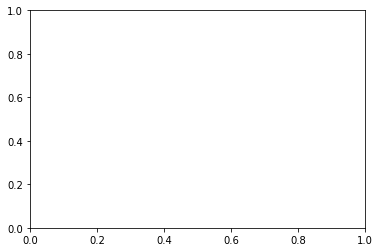

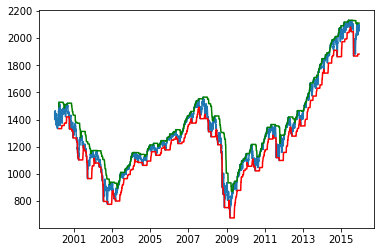

In [157]:
# lets now take a look and see if its doing something sensible
import matplotlib
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(data['Date'], data['Close'],label=i)
ax1.plot(data['Date'], data['RollingMax'], color = 'g')
ax1.plot(data['Date'], data['RollingMin'], color = 'r')
plt.show()

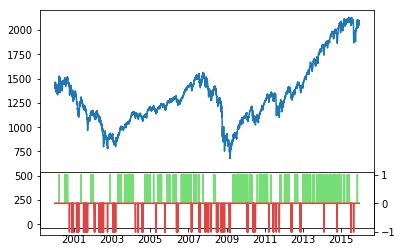

In [162]:
# lets now take a look and see if its doing something sensible
import matplotlib
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(1,1)
ax1.plot(data['Date'], data['Close'])
y = ax1.get_ylim()
ax1.set_ylim(y[0] - (y[1]-y[0])*0.4, y[1])

ax2 = ax1.twinx()
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))
ax2.plot(data['Date'], data['Buy'], color='#77dd77')
ax2.plot(data['Date'], data['Sell'], color='#dd4444')
plt.show()

In [163]:
number_of_buys = data['Buy'].sum()
number_of_sell =- data['Sell'].sum()
print("number_of_buy: ", number_of_buys)
print("number_of_sell: ", number_of_sell)

number_of_buy:  481.0
number_of_sell:  201.0


In [168]:
buy_prices = data[data['Buy'] == 1]['Close']
sell_prices = data[data['Sell'] == -1]['Close']


buy_prices = pd.Series.to_frame(buy_prices)
buy_prices = buy_prices.rename(columns={'Close': 'Close_buy'})
print(buy_prices.shape)
sell_prices = pd.Series.to_frame(sell_prices)
sell_prices = sell_prices.rename(columns={'Close': 'Close_sell'})
print(sell_prices.shape)
total_size = sell_prices.shape[0] + buy_prices.shape[0]
print("total size: ", total_size)

(481, 1)
(201, 1)
total size:  682


In [169]:
buy_prices['buy_signal'] = 1
sell_prices['sell_signal'] = -1
# dataframe with dates as indices, buy and sell prices 
#and buy-sell token to understand if we need to buy or sell
buy_and_sell = buy_prices.join(sell_prices, how='outer')
# it's fine to have NaNs in other columns
print(buy_and_sell.head())
print(buy_and_sell.tail())

      Close_buy  buy_signal   Close_sell  sell_signal
23  2109.790039         1.0          NaN          NaN
24  2104.050049         1.0          NaN          NaN
72          NaN         NaN  1867.609985         -1.0
73          NaN         NaN  1893.209961         -1.0
74          NaN         NaN  1970.890015         -1.0
        Close_buy  buy_signal  Close_sell  sell_signal
3874  1495.839966         1.0         NaN          NaN
3875  1492.920044         1.0         NaN          NaN
3950  1527.459961         1.0         NaN          NaN
3951  1527.349976         1.0         NaN          NaN
3952  1500.640015         1.0         NaN          NaN


In [171]:
# compute revenue of turtle trading method
def compute_revenue(initial_holdings,
                    # A possible strategy is to always buy and sell fixed amounts. In the actual turtle 
                    # strategy these were dynamical, adjusted on the volatility of the stocks 
                    # If use_fixed_USD_amount = False then we use an even simpler (but less realistic)
                    # strategy, that is always buy or sell 1 BTC (when there is a signal),
                    #no matter how much it cost.
                    use_fixed_USD_amount = False, fixed_amount_buy = 100, fixed_amount_sell = 100,
                    # Starting from initial_holdings, could we borrow additional USD?
                    allow_negative_usd_holdings = False):
    
    usd_holdings = initial_holdings
    btc_holdings_value = 0
    total_holdings_value = []
    dates = []
    number_of_btc = 0
    for i in range(len(buy_and_sell)):
        
        if( buy_and_sell.iloc[i]['buy_signal'] == 1):
            
            current_price = buy_and_sell.iloc[i]['Close_buy']
            if (( usd_holdings - current_price > 0) 
               or (( usd_holdings - current_price < 0) and (allow_negative_usd_holdings == True))):
                
                if use_fixed_USD_amount:
                    btc_to_buy = float(fixed_amount_buy)/current_price
                    number_of_btc += btc_to_buy
                    usd_holdings = usd_holdings - fixed_amount_buy
                else:
                    number_of_btc += 1
                    usd_holdings = usd_holdings - current_price   
                
            
        if( buy_and_sell.iloc[i]['sell_signal'] == -1):
        
            current_price = buy_and_sell.iloc[i]['Close_sell']
            
            if (use_fixed_USD_amount and (number_of_btc > 0)):
                btc_to_sell = float(fixed_amount_sell)/current_price
                if (btc_to_sell > number_of_btc):
                    number_of_btc += btc_to_sell
                    usd_holdings = usd_holdings + fixed_amount_sell
            elif (number_of_btc > 0):
                number_of_btc -= 1
                usd_holdings = usd_holdings + current_price   
        
        btc_holdings_value = number_of_btc * current_price
        total_holdings_value.append(btc_holdings_value + usd_holdings)
        dates.append(buy_and_sell.index[i])
    
    
    print("Number of BTC remaining: ", number_of_btc)
    print("btc_holdings_value: ", btc_holdings_value)
    print("usd_holdings_value: ",usd_holdings)
    print("total_holdings_value: ",total_holdings_value[-1])
    print("Total Gain (ROI): ", (total_holdings_value[-1]/float(initial_holdings) -1) *100 , "%")
    
    return btc_holdings_value, usd_holdings, total_holdings_value, number_of_btc, dates

In [173]:
def plot_revenue(dates, total_holdings_value):
    import matplotlib.dates as mdates
    fig, ax = plt.subplots()
    ax.plot(dates, total_holdings_value)
    plt.ylabel('total_holdings_value')

    years = mdates.YearLocator()   # every year
    ax.xaxis.set_major_locator(years)

    #datemin = datetime.date(2015, 6, 1)
    #datemax = datetime.date(2017, 1, 1)
    #ax.set_xlim(datemin, datemax)

    fig.autofmt_xdate()
    plt.show()

Number of BTC remaining:  284
btc_holdings_value:  426181.76426
usd_holdings_value:  550247.080625
total_holdings_value:  976428.844885
Total Gain (ROI):  -2.3571155115 %


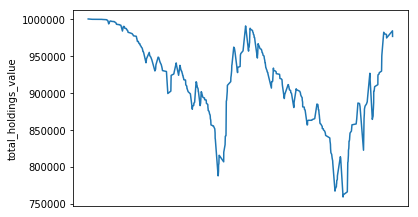

In [174]:
one_milion = 1000000
initial_holdings = 1 * one_milion

# always buy/sell 1 BTC
_, _, total_holdings_value1, _, dates1 = compute_revenue(initial_holdings ,
                                                       allow_negative_usd_holdings = False)
plot_revenue(dates1, total_holdings_value1)

Number of BTC remaining:  35.9130205756
btc_holdings_value:  53892.5157352
usd_holdings_value:  951900
total_holdings_value:  1005792.51574
Total Gain (ROI):  0.579251573523 %


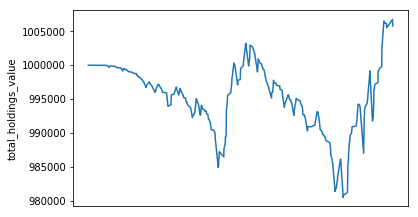

In [175]:
# always buy/sell a fixed amount
initial_holdings = 1 * one_milion

_, _, total_holdings_value2, _, dates2 = compute_revenue(initial_holdings ,
                                                       use_fixed_USD_amount = True, 
                                                       fixed_amount_buy = 100, 
                                                       fixed_amount_sell = 100)
plot_revenue(dates2, total_holdings_value2)